# 최대가능도 (maximum likelihood) 추정법

https://datascienceschool.net/02%20mathematics/09.02%20최대가능도%20추정법.html

## 예제
정규분포의 확률밀도함수는 다음과 같은 단변수 함수다.

$\begin{align}
p(x; \mu_0, \sigma_0^2) = \dfrac{1}{\sqrt{2\pi\sigma_0^2}} \exp \left(-\dfrac{(x-\mu_0)^2}{2\sigma_0^2}\right)
\tag{9.2.6}
\end{align}$

모수가 상수라는 것을 강조하기 위해 아래첨자를 붙였다. 이때 가능도함수는 다음과 같이 입력변수가 2개인 다변수 함수가 된다.

$\begin{align}
L(\mu, \sigma^2; x_0) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_0-\mu)^2}{2\sigma^2}\right)
\tag{9.2.7}
\end{align}$

수식은 같지만 함수의 변수가 다르다는 점에 주의하라.

<br>

- 예를 들어 정규분포에서 기댓값 모수와 분산 모수를 입력 변수로 가지는 가능도함수를 그리면 각각 다음과 같다. 기댓값 모수를 입력 변수로 가지는 가능도함수의 모양이 확률밀도함수와 같은 모양인 것은 (𝑥와 𝜇를 바꾸어도 식이 같아지는) 정규분포의 확률밀도함수가 가지는 특별한 성질 때문이며 아주 우연히 이렇게 된 것뿐이다.

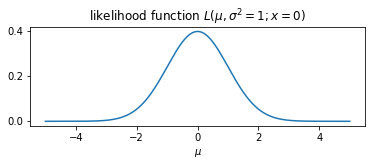

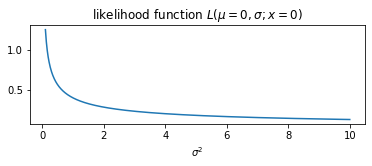

In [5]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)
plt.plot(mus, likelihood_mu)
plt.title("likelihood function $L(\mu, \sigma^2=1; x=0)$")
plt.xlabel("$\mu$")
plt.show()

def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.title("likelihood function $L(\mu=0, \sigma; x=0)$")
plt.xlabel("$\sigma^2$")
plt.show()

### 𝐿(𝜇,𝜎2)은 이차원 함수이므로 입체로 그리면 다음과 같다.

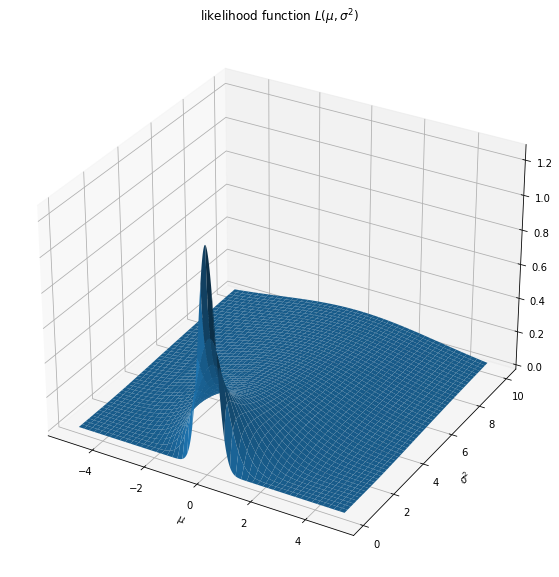

In [8]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma^2$')
plt.title('likelihood function $L(\mu, \sigma^2)$')
plt.show()